Your Task
Exploratory Data Analysis
Use pandas to load the dataset and examine the first few rows.
Check and handle the missing values.
Drop any unnecessary column
Create a Countplot to display diagnosis from magma

Data Preprocessing, Building Models and Evaluation :
counts of unique rows in the ‘diagnosis’ column
map categorical values to numerical values
Splitting the data into train and test
Implement logistic regression and print the accuracy.
Implement K Nearest Neighbours and print the accuracy.
Implement Random Forests and print the accuracy.
Implement Support Vector Machines (SVM) and print the accuracy.
Which is the best model ?


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


First 5 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_

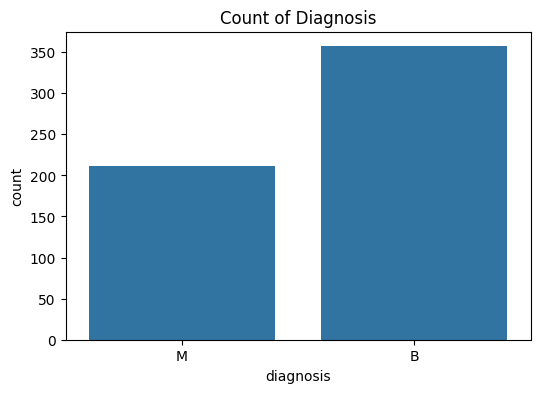


Counts of unique diagnosis values:
diagnosis
B    357
M    212
Name: count, dtype: int64

Logistic Regression Accuracy: 0.9650
K Nearest Neighbours Accuracy: 0.9650
Random Forests Accuracy: 0.9650
Support Vector Machines (SVM) Accuracy: 0.9580

Based on accuracy on the test set, the best model is: Logistic Regression with an accuracy of 0.9650


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv(f"{path}/data.csv")

# Examine the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check and handle missing values
print("\nMissing values before handling:")
print(df.isnull().sum())

# The 'Unnamed: 32' column seems to be entirely missing, and 'id' is not useful for modeling.
# Drop unnecessary columns: 'id' and 'Unnamed: 32'
df = df.drop(['id', 'Unnamed: 32'], axis=1)

print("\nMissing values after dropping columns:")
print(df.isnull().sum())

# Create a Countplot to display diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Count of Diagnosis')
plt.show()

# Data Preprocessing
# Counts of unique rows in the ‘diagnosis’ column
print("\nCounts of unique diagnosis values:")
print(df['diagnosis'].value_counts())

# Map categorical values to numerical values
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Splitting the data into train and test
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Implement Logistic Regression
log_reg = LogisticRegression(max_iter=10000) # Increased max_iter for convergence
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nLogistic Regression Accuracy: {accuracy_lr:.4f}")

# Implement K Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K Nearest Neighbours Accuracy: {accuracy_knn:.4f}")

# Implement Random Forests
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forests Accuracy: {accuracy_rf:.4f}")

# Implement Support Vector Machines (SVM)
# Using a linear kernel, as it often performs well
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Support Vector Machines (SVM) Accuracy: {accuracy_svm:.4f}")

# Which is the best model?
accuracies = {
    'Logistic Regression': accuracy_lr,
    'K Nearest Neighbours': accuracy_knn,
    'Random Forests': accuracy_rf,
    'Support Vector Machines (SVM)': accuracy_svm
}

best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]

print(f"\nBased on accuracy on the test set, the best model is: {best_model_name} with an accuracy of {best_accuracy:.4f}")
